#  Baseline Neural Network Model Performance

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Next, we can initialize the random number generator to ensure that we always get the same results when executing this code. This will help if we are debugging:

In [3]:
seed = 7
np.random.seed(seed)

# Load the dataset and split the columns into 60 input variables (X) and 1 output variable (Y)

In [4]:
# from google.colab import files
# uploaded = files.upload()
df=pd.read_csv("https://raw.githubusercontent.com/itsfk/Binary-Classification-Project-1-Sonar-Data/master/sonar.csv")

In [7]:
df.head(100)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0181,0.0146,0.0026,0.0141,0.0421,0.0473,0.0361,0.0741,0.1398,0.1045,...,0.0223,0.0255,0.0145,0.0233,0.0041,0.0018,0.0048,0.0089,0.0085,R
96,0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,...,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439,M
97,0.1313,0.2339,0.3059,0.4264,0.4010,0.1791,0.1853,0.0055,0.1929,0.2231,...,0.0362,0.0210,0.0154,0.0180,0.0013,0.0106,0.0127,0.0178,0.0231,M
98,0.0201,0.0423,0.0554,0.0783,0.0620,0.0871,0.1201,0.2707,0.1206,0.0279,...,0.0191,0.0182,0.0160,0.0290,0.0090,0.0242,0.0224,0.0190,0.0096,M


In [5]:
# df.dtypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [6]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
data=df.values

In [9]:
# split into input (X) and output (Y) variables
X = data[:,0:60].astype(float)
Y = data[:,60]

In [10]:
# print(len(X[0]))
# print(X.size())

In [11]:
# Y
# print(len(Y))
# print(len(Y[0]))

# The output variable is string values. We must convert them into integer values 0 and 1.

In [12]:
labelEncode = LabelEncoder()
Y =  labelEncode.fit_transform(Y)

In [13]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

# Creating a baseline model

In [15]:
# #Initializations define the way to set the initial random weights of Keras layers
# from keras import initializers
# initial = initializers.random_normal()
# def create_baseline():
#     # create model
#     model = Sequential()
#     model.add(Dense(60, input_dim=60, kernel_initializer=initial, activation='relu'))
#     model.add(Dense(1, kernel_initializer=initial, activation='sigmoid'))
#     # Compile model
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

### Now it is time to evaluate this model using stratified cross validation in the scikit-learn framework.

In [16]:
#To use Keras models with scikit-learn, we must use the KerasClassifier wrapper.
# estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
# kFolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# results = cross_val_score(estimator, X, Y, cv=kFolds)
# print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Re-Run The Baseline Model With Data Preparation

In [17]:
# Standardization is important because the data is rescaled such that the mean value for each attribute is 0 and the standard deviation is 1. 
# evaluate baseline model with standardized dataset
# np.random.seed(seed)
# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
# pipeline = Pipeline(estimators)
# kFolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# results = cross_val_score(pipeline, X, Y, cv=kFolds)
# print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Tuning Layers and Number of Neurons in The Model

### 4.1. Evaluate a Smaller Network

In [18]:
# def create_smaller():
#     # create model
#     model = Sequential()
#     model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
#     # Compile model
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model
# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
# pipeline = Pipeline(estimators)
# kFolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# results = cross_val_score(pipeline, X,Y, cv=kFolds)
# print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Step 4.2. Evaluate a Larger Network

In [19]:
# def create_larger():
#     # create model
#     model = Sequential()
#     model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(30, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
#     # Compile model
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model
# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=0)))
# pipeline = Pipeline(estimators)
# kFolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# results = cross_val_score(pipeline, X, Y, cv=kFolds)
# print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Rewriting the code using the Keras Functional API

In [20]:
# import keras
# from keras import layers
# def kerasApiModel():
#     # create model
#                     inputs = keras.Input(shape=(60,))
#                     a = layers.Dense(60, activation='relu')(inputs)
#                     a = layers.Dense(10, activation='relu')(a)
#                     outputs = layers.Dense(1, activation='sigmoid')(a)
#                     model = keras.Model(inputs, outputs)
#                      # Compile model
#                     model.compile(loss='binary_crossentropy', optimizer='adam',   metrics=['accuracy'])
#                     return model

# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasClassifier(build_fn=kerasApiModel, epochs=20, batch_size=4, verbose=0)))
# pipeline = Pipeline(estimators)
# kFolds = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)
# results = cross_val_score(pipeline, X, Y, cv=kFolds)
# print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Rewriting the code by doing Model Subclassing

In [21]:
# import tensorflow as tf
# import keras
# class MyModel(tf.keras.Model):
    
#         def __init__(self):
            
#                         super(MyModel, self).__init__()
#                         self.dense1 = Dense(60, activation="relu")
#                         self.dense2 = Dense(10, activation='relu')
#                         self.dense3 = Dense(1, activation='sigmoid')

#         def call(self, inputs):

#                         x = self.dense1(inputs)
#                         x = self.dense2(x)
#                         return self.dense3(x)
                        
                    
# model = MyModel()
# model.compile(loss='binary_crossentropy', optimizer='adam',   metrics=['accuracy'])
# model.fit(X,Y, epochs=20, batch_size=4,verbose=False)

In [51]:
# **Build Model from scratch without Scikit Learn**
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import numpy as np
import math
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)
batch_size = 32
from keras import optimizers
def final_model():
  network = Sequential()
  network.add(Dense(60, activation='relu',input_shape=(60,)))
  network.add(Dense(30, activation='relu'))
  network.add(Dense(1, activation='sigmoid'))
  network.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=["accuracy"])
  return network

model1 = final_model()
# hist=model1.fit(X_train, Y_train , epochs=40 , batch_size=32, verbose=1, validation_data = (X_test,Y_test))
train_error_hist1 = list()
test_error_hist1 = list()
test_acc_hist1 = list()
# batch_size=32
itr = 0
n_batches = math.ceil(len(scaled_x_train) / batch_size)


while itr < 30:
    for i in range(n_batches):
        X_batch = scaled_x_train[i*batch_size:(i+1)*batch_size]
        y_batch = Y_train[i*batch_size:(i+1)*batch_size]
        
        loss = model1.train_on_batch(X_batch, y_batch)
        train_error_hist1.append(loss[0])
        loss1 = model1.test_on_batch(scaled_x_test, Y_test)
        test_error_hist1.append(loss1[0])
        test_acc_hist1.append(loss1[1])
        
        #         print(loss1)
        
#         print(itr,i,loss)
    
    itr = itr+1






In [52]:
# model1.batch_size
print(test_acc_hist1)

[0.6875, 0.6875, 0.6875, 0.6875, 0.6875, 0.65625, 0.65625, 0.6875, 0.71875, 0.6875, 0.6875, 0.71875, 0.75, 0.75, 0.75, 0.78125, 0.78125, 0.8125, 0.8125, 0.8125, 0.8125, 0.8125, 0.8125, 0.8125, 0.78125, 0.78125, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.78125, 0.75, 0.78125, 0.75, 0.75, 0.78125, 0.75, 0.78125, 0.78125, 0.75, 0.8125, 0.75, 0.8125, 0.78125, 0.78125, 0.8125, 0.78125, 0.8125, 0.78125, 0.78125, 0.8125, 0.78125, 0.8125, 0.78125, 0.78125, 0.8125, 0.78125, 0.8125, 0.78125, 0.78125, 0.8125, 0.8125, 0.78125, 0.78125, 0.78125, 0.78125, 0.8125, 0.78125, 0.78125, 0.78125, 0.78125, 0.8125, 0.78125, 0.78125, 0.8125, 0.78125, 0.8125, 0.78125, 0.8125, 0.8125, 0.78125, 0.8125, 0.78125, 0.8125, 0.8125, 0.78125, 0.8125, 0.78125, 0.8125, 0.8125

In [24]:
# hist = model1.test_on_batch(X_test,Y_test)

In [25]:
# print(hist['accuracy'],hist['loss'])

In [41]:
# X_train = X
# Y_train = Y
# X_test = X
# Y_test = Y
model = final_model()

def eval_ratios(sx_train_g, sx_train_b, y_train_g, y_train_b, model):
    test_g = model.test_on_batch(sx_train_g,y_train_g)
    test_b = model.test_on_batch(sx_train_b,y_train_b)
    return 1-test_g[1] + 0.1, 1-test_b[1] + 0.1



sx_train_g = scaled_x_train[ Y_train==0 ]
sx_train_b = scaled_x_train[ Y_train==1 ]
y_train_g = Y_train[Y_train==0]
y_train_b = Y_train[Y_train==1]

import math
# Train
train_error_hist = list()
test_error_hist = list()
test_acc_hist = list()

itr = 0
n_batches = math.ceil(len(scaled_x_train) / batch_size)


ratio_g = 1
ratio_b = 1
best_model = model
best_acc = 0.1
best_index = 0

# sample_weight = np.random.rand(len(X_train_g[0]))

while itr < 30:
    
    ptr_g = 0
    ptr_b = 0

    allot_num_g = 1
    allot_num_b = 1

    for i in range(n_batches):
        
        allot_num_g = ( ratio_g / (ratio_g + ratio_b) )*batch_size
        allot_num_g = (int)(allot_num_g)
        allot_num_b = batch_size - allot_num_g

        X_batch = sx_train_g[ ptr_g: ptr_g+allot_num_g ]
        tempp = sx_train_b[ ptr_b: ptr_b+allot_num_b]

        X_batch = np.concatenate([X_batch, tempp])
        

        y_batch = y_train_g[ ptr_g: ptr_g+allot_num_g]
        tempp = y_train_b[ ptr_b: ptr_b+allot_num_b]
        
        y_batch = np.concatenate([y_batch, tempp])
        
#         print(ptr_g, ptr_b, allot_num_g, allot_num_b)
#         print(len(y_batch[y_batch==1]),len(y_batch[y_batch==0])  )

#         print(i,"--------------------------------------------------------------")
#         print(X_batch)
#         print(i,"--------------------------------------------------------------")
#         print(y_batch)
#         y_batch = np.concatenate((y_batch, tempp), axis=0 )
        
#         X_batch = scaled_x_train[i*batch_size:(i+1)*batch_size]
#         y_batch = y_train[i*batch_size:(i+1)*batch_size]
        
        loss = model.train_on_batch(X_batch, y_batch)
#         print(model.layers[0].weights)
        train_error_hist.append(loss[0])
        
        loss1 = model.test_on_batch(scaled_x_test, Y_test)
        test_error_hist.append(loss1[0])
        test_acc_hist.append(loss1[1])
        if loss1[1] > best_acc:
            best_model = model
            best_index = itr*n_batches+i
            
        ratio_g, ratio_b = eval_ratios(sx_train_g, sx_train_b, y_train_g, y_train_b, model)
#         ratio_g = 1
#         ratio_b = 1
#         print(ratio_g, ratio_b)
        ptr_b+=allot_num_b
        ptr_g+=allot_num_g
    
#     loss1 = model.test_on_batch(scaled_x_test, Y_test)

    
    itr = itr+1

# model.fit(x=scaled_x_train, y=y_train, epochs=iterations, validation_split=validation_split, batch_size=batch_size)



In [42]:
print(loss)

[0.347950279712677, 1.0]


In [43]:
# print(max(test_error_hist))
# print(max(train_error_hist))
print(max(test_acc_hist))
print(max(test_acc_hist1))

0.84375
0.84375


In [44]:
# print(max(hist.history['loss']))
# print(max(hist.history['val_accuracy']))
# print(max(hist.history['val_accuracy']))

In [45]:
# import matplotlib.pyplot as plt
# plt.plot(test_error_hist)
# plt.plot(train_error_hist)
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper right')
# plt.show()

In [39]:
# plt.plot(hist.history['loss'])
# # plt.plot(hist.history['val_loss'])
# # plt.plot(test_error_hist)
# # plt.plot(train_error_hist)
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper right')
# plt.show()
# print(max(hist.history['loss']))
# # print(max(hist.history['val_loss']))

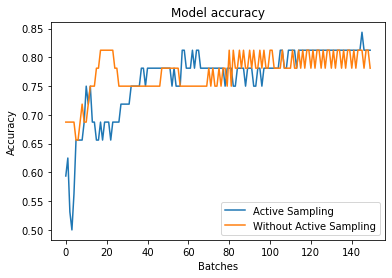

In [59]:
import matplotlib.pyplot as plt
plt.plot(test_acc_hist)
plt.plot(test_acc_hist1)
# plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Batches')
plt.legend(['Active Sampling', 'Without Active Sampling'], loc='lower right')
plt.show()
# print(max(test_acc_hist))

In [55]:
print(max(test_acc_hist))

0.84375


In [60]:
print(max(test_acc_hist1))

0.8125


In [ ]:
# # plt.plot(test_acc_hist)
# plt.plot(hist.history['accuracy'])
# # plt.plot(hist.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='lower right')
# plt.show()

In [57]:
path='Weights_folder/Sonar_Weights_AS.h5'
model.save_weights(path)
path='Weights_folder/Sonar_Weights.h5'
model1.save_weights(path)


In [71]:
from sklearn.metrics import classification_report, confusion_matrix
def myfunc(x):
    if x<0.5:
        return 0
    return 1

In [79]:
yas_pred = model.predict(scaled_x_test)
# print(yas_pred)
# yas_pred = np.argmax(yas_pred)
# print(yas_pred)

for i in range(len(yas_pred)):
#     print(yas_pred[i])
    yas_pred[i] = myfunc(yas_pred[i])
# print(yas_pred)

In [75]:
print(classification_report(Y_test, yas_pred))

print(confusion_matrix(Y_test, yas_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        22
           1       0.75      0.60      0.67        10

    accuracy                           0.81        32
   macro avg       0.79      0.75      0.77        32
weighted avg       0.81      0.81      0.81        32

[[20  2]
 [ 4  6]]


In [78]:
y_pred = model1.predict(scaled_x_test)
# print(yas_pred)
# yas_pred = np.argmax(yas_pred)
# print(yas_pred)

for i in range(len(y_pred)):
#     print(y_pred[i])
    y_pred[i] = myfunc(y_pred[i])
# print(y_pred)
print(classification_report(Y_test, y_pred))

print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        22
           1       0.64      0.70      0.67        10

    accuracy                           0.78        32
   macro avg       0.75      0.76      0.75        32
weighted avg       0.79      0.78      0.78        32

[[18  4]
 [ 3  7]]
